In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import sys

In [38]:
assert hasattr(tf, "function") # Be sure to use tensorflow 2.0

### Load the dataset: FASHION MNIST

In [7]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(images, targets), (_, _) = fashion_mnist.load_data()

In [40]:
images = images[:10000]
targets = targets[:10000]

In [6]:
print(images.shape)
print(targets.shape)

(10000, 28, 28)
(10000,)


### Scaling the data

In [8]:
# flatten
images = images.reshape(-1, 784)
images= images.astype(float)

print(images.mean(), images.std())


72.94035223214286 90.02118235130519


In [9]:
scaler = StandardScaler()
images = scaler.fit_transform(images)
print(images.mean(), images.std())

-1.8899470046408106e-18 1.000000000000002


In [10]:
images_train, images_test, targets_train, targets_test = train_test_split(images, targets, test_size = 0.2, random_state = 1)

In [44]:
print(images_train.shape, targets_train.shape)
print(images_test.shape, targets_test.shape)

(8000, 784) (8000,)
(2000, 784) (2000,)


### Plot one of the data

In [45]:
targets_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

TypeError: Invalid shape (784,) for image data

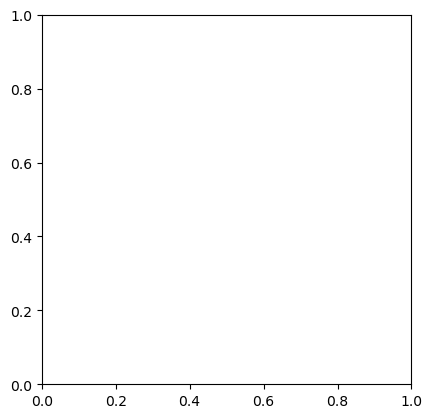

In [46]:
# show one image
plt.imshow(images[10], cmap="binary")
plt.title(targets_names[targets[10]])
plt.show()

### Add the layers

In [51]:
# Create the model
model = tf.keras.models.Sequential()
# no need to flatten the images.

# Add the layers
model.add(tf.keras.layers.Dense(256, activation = "relu"))
model.add(tf.keras.layers.Dense(128, activation = "relu"))
model.add(tf.keras.layers.Dense(10, activation = "softmax"))

model_output = model.predict(images[0:1])
print(model_output, targets[0:1])


1/1 [==============================] - 0s 130ms/step
[[0.13157588 0.01853541 0.14137763 0.03457398 0.0568472  0.10587946
  0.04754196 0.11666143 0.07251383 0.27449328]] [9]


### Model summary

In [47]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               200960    
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


### Compile the model

In [52]:
model.compile(
    loss = "sparse_categorical_crossentropy", 
    optimizer = "sgd", # Stochastic gradient descent
    metrics = ["accuracy"])

In [53]:
history = model.fit(images_train, targets_train, epochs=10, validation_split=0.2)

Epoch 1/10
200/200 [==============================] - 2s 5ms/step - loss: 0.9103 - accuracy: 0.6972 - val_loss: 0.6448 - val_accuracy: 0.7600
Epoch 2/10
200/200 [==============================] - 1s 4ms/step - loss: 0.5447 - accuracy: 0.8106 - val_loss: 0.5507 - val_accuracy: 0.7919
Epoch 3/10
200/200 [==============================] - 1s 5ms/step - loss: 0.4580 - accuracy: 0.8397 - val_loss: 0.5092 - val_accuracy: 0.8012
Epoch 4/10
200/200 [==============================] - 1s 4ms/step - loss: 0.4096 - accuracy: 0.8591 - val_loss: 0.4972 - val_accuracy: 0.8150
Epoch 5/10
200/200 [==============================] - 1s 4ms/step - loss: 0.3725 - accuracy: 0.8753 - val_loss: 0.4739 - val_accuracy: 0.8194
Epoch 6/10
200/200 [==============================] - 1s 4ms/step - loss: 0.3453 - accuracy: 0.8844 - val_loss: 0.4569 - val_accuracy: 0.8263
Epoch 7/10
200/200 [==============================] - 1s 4ms/step - loss: 0.3206 - accuracy: 0.8934 - val_loss: 0.4593 - val_accuracy: 0.8350
Epoch 

In [24]:
print(history.history)

{'loss': [0.9304900169372559, 0.5554705262184143, 0.46472102403640747, 0.41182002425193787, 0.3731449544429779, 0.34411412477493286, 0.3212084472179413, 0.2997779846191406, 0.2811088562011719, 0.2648071348667145], 'accuracy': [0.6868749856948853, 0.8090624809265137, 0.8396875262260437, 0.8584374785423279, 0.8725000023841858, 0.8834375143051147, 0.8918750286102295, 0.9006249904632568, 0.9071875214576721, 0.9128124713897705], 'val_loss': [0.661120593547821, 0.5542190074920654, 0.5187324285507202, 0.4986268877983093, 0.4744165539741516, 0.4600408673286438, 0.45658981800079346, 0.4515794515609741, 0.43672722578048706, 0.4390328526496887], 'val_accuracy': [0.7674999833106995, 0.7993749976158142, 0.8075000047683716, 0.8199999928474426, 0.8231250047683716, 0.8274999856948853, 0.8368750214576721, 0.8381249904632568, 0.8424999713897705, 0.8424999713897705]}


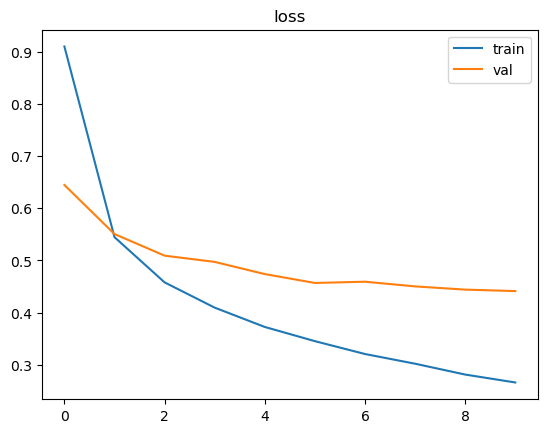

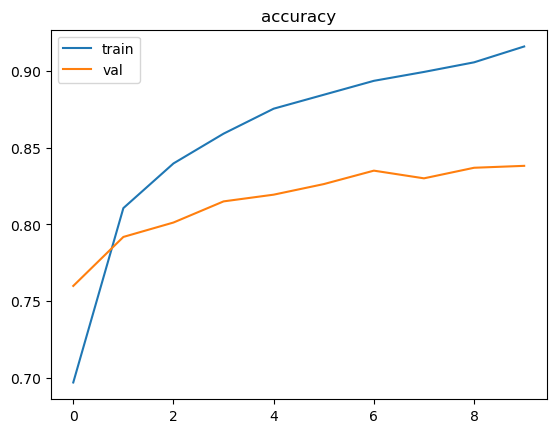

In [54]:
loss_curve = history.history["loss"]
accuracy_curve = history.history["accuracy"]

loss_val_curve = history.history["val_loss"]
accuracy_val_curve = history.history["val_accuracy"]

plt.plot(loss_curve, label="train")
plt.plot(loss_val_curve, label="val")
plt.title("loss")
plt.legend()
plt.show()

plt.plot(accuracy_curve, label="train")
plt.plot(accuracy_val_curve, label="val")
plt.title("accuracy")
plt.legend()
plt.show()

### Save model

In [1]:
model.save("simple_nn.h5")

NameError: name 'model' is not defined

### Load model

In [5]:
loaded_model = tf.keras.models.load_model("simple_nn.h5")

In [11]:
loss, accuracy = loaded_model.evaluate(images_test, targets_test)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

375/375 [==============================] - 1s 2ms/step - loss: 0.4183 - accuracy: 0.8537
Loss:  0.4183085262775421
Accuracy:  0.8537499904632568


In [15]:
print(loaded_model.predict(images_test[12:13]), targets_test[12:13])

1/1 [==============================] - 0s 78ms/step
[[5.7858448e-03 1.9036679e-03 1.0335537e-01 8.3308345e-01 3.4155980e-02
  5.0100713e-04 1.9958805e-02 1.3522897e-04 9.4659900e-04 1.7396860e-04]] [3]
